In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
ids = pd.read_csv('IRIS.csv')

In [52]:
ids.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
ids.shape

(150, 5)

In [54]:
ids.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [55]:
#there are no null values present in the dataset
ids.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [56]:
#using group by we can get how many number of each different species present in each column
ids.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [57]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='species', ylabel='count'>

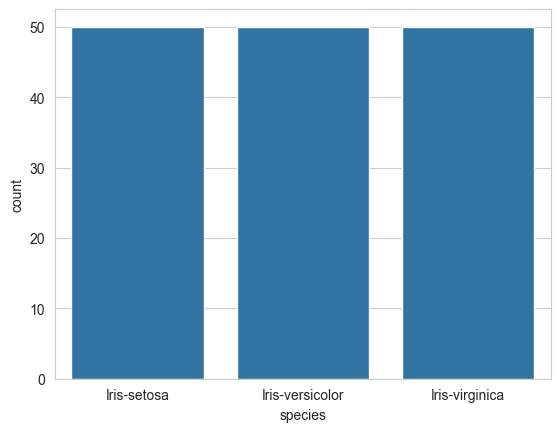

In [58]:
sns.countplot(x = ids.species)

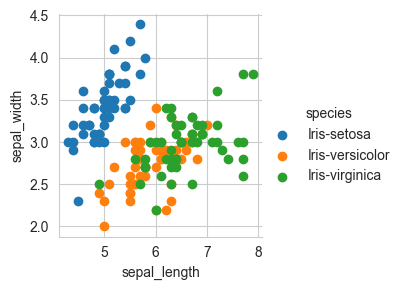

In [59]:
#plotting different species on the 2d plot
sns.set_style('whitegrid')
sns.FacetGrid(ids,hue='species').map(plt.scatter,'sepal_length','sepal_width').add_legend()
plt.show()

<Axes: >

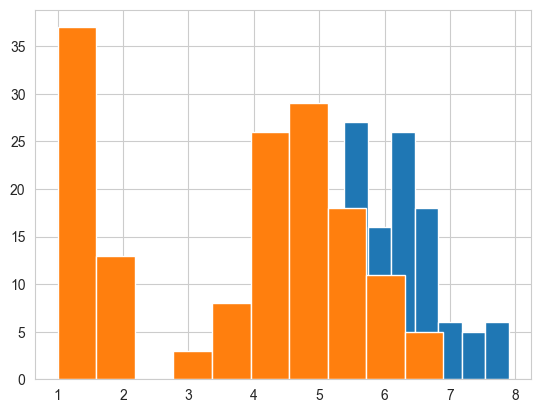

In [67]:
#this will give distribution of sepal length and petal _length
ids['sepal_length'].hist()
ids['petal_length'].hist()

<Axes: >

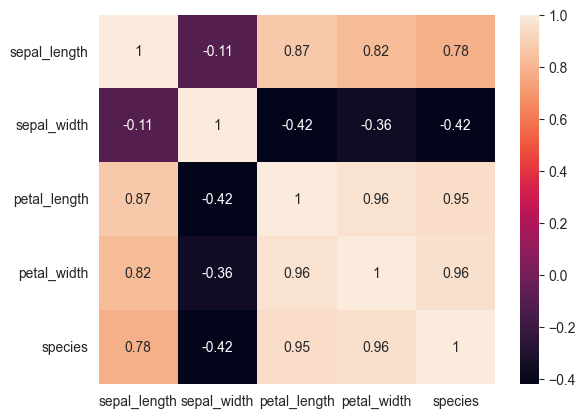

In [60]:
#now we will encode the species column using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ids['species'] = encoder.fit_transform(ids['species'])
ids.corr()
sns.heatmap(ids.corr(),annot=True)

In [61]:
ids.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
#now let us split the data set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(ids.drop(['species'],axis=1),ids['species'],test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
predict = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score as asc
ascscore = asc(y_test,predict)
ascscore
print("Accuracy Score : ",ascscore*100)

Accuracy Score :  96.66666666666667


In [65]:
petal_len = 5.7
petal_width = 3.0
sepal_len = 4.2
sepal_width = 1.2
species = model.predict([[sepal_len,sepal_width,petal_len,petal_width]])
if species == 0:
    print('Iris-Setosa')
elif species == 1:
    print('Iris Versicolor')
else:
    print('Iris Verginica')

Iris Verginica


c:\Users\saite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
